# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?


In [53]:
#import pandas
import pandas as pd


In [54]:
#read in csv
ab_nyc_2019 = pd.read_csv('../data/AB_NYC_2019.csv')


In [55]:
#view data summary at high level
display(ab_nyc_2019.describe())

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [56]:
#To confirm number of reviews is infact an int before we drop it
display(ab_nyc_2019['number_of_reviews'])

0          9
1         45
2          0
3        270
4          9
        ... 
48890      0
48891      0
48892      0
48893      0
48894      0
Name: number_of_reviews, Length: 48895, dtype: int64

In [72]:
#Accounts that have no reviews(therefore they also don't have a last_review) should be considered inactive or new/never used
#Therefore we will remove this data from our dataset
num_of_rev = ab_nyc_2019[ab_nyc_2019['number_of_reviews'] < 1]

#Dropped NaN values from last review column in our datafram
ab_nyc_2019.dropna(subset=['last_review'], inplace=True)
#Confirmed that last review column only contained rows with values
display(ab_nyc_2019.isna().sum)

display(ab_nyc_2019)



<bound method DataFrame.sum of           id   name  host_id  host_name  neighbourhood_group  neighbourhood  \
0      False  False    False      False                False          False   
1      False  False    False      False                False          False   
3      False  False    False      False                False          False   
4      False  False    False      False                False          False   
5      False  False    False      False                False          False   
...      ...    ...      ...        ...                  ...            ...   
48782  False  False    False      False                False          False   
48790  False  False    False      False                False          False   
48799  False  False    False      False                False          False   
48805  False  False    False      False                False          False   
48852  False  False    False      False                False          False   

       latitude  lon

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
9974,7670562,JFK 10 & LGA 15 MINUTES A/C PRIVATE BEDROOM,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69604,-73.82449,Private room,50,1,424,2018-11-25,8.86,5,0
9976,7675781,JFK 10 & LGA 15 MINUTES AWAY A/C PRIVATE BED...,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69463,-73.82610,Private room,50,1,408,2018-11-24,8.56,5,0
22104,17779504,Relaxing Quiet Room Just 6 Mins from JFK Airport!,121391142,Deloris,Queens,Springfield Gardens,40.66535,-73.76367,Private room,65,1,368,2019-06-21,13.24,2,0
5876,4282178,A Superhost SALE! DELUXE Room!,21641206,Veronica,Brooklyn,Bedford-Stuyvesant,40.69724,-73.94914,Private room,53,1,351,2019-06-24,6.09,4,0


<Axes: title={'center': 'Busiest Hosts:\nZero Availability and Most Reviews'}, xlabel='host_id,host_name', ylabel='Reviews'>

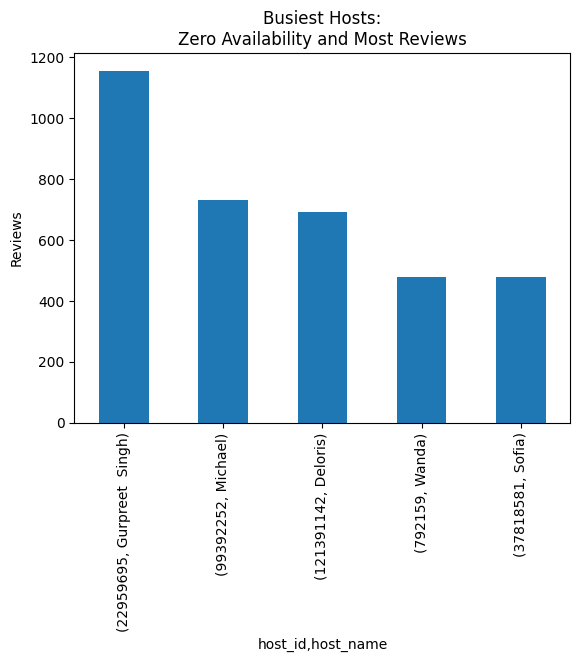

In [58]:
# Which hosts are the busiest and why?

#We determined that busiest hosts would be anyone who did not have availability
busiest_host = ab_nyc_2019[ab_nyc_2019['availability_365'] < 1]
#Then out of those hosts, the ones with the most review would be our top hosts
display(busiest_host.sort_values('number_of_reviews', ascending=False).head())

busiest_host_plot = busiest_host.groupby(['host_id', 'host_name']).sum('number_of_reviews').sort_values('number_of_reviews', ascending=False).head()[['number_of_reviews']]
busiest_host_plot.plot(y='number_of_reviews', kind='bar', ylabel='Reviews', legend=False, title='Busiest Hosts:\nZero Availability and Most Reviews')


In [59]:
# How many neighborhood groups are available and which shows up the most?

ab_nyc_2019.groupby('neighbourhood_group', as_index=False).sum()[['neighbourhood_group', 'calculated_host_listings_count']]

# We have determined that there are 5 neighbourhood groups and the neighbourhood that shows up the most is Manhattan with 145,852 listings







,neighbourhood_group,calculated_host_listings_count
0,Bronx,1931
1,Brooklyn,36727
2,Manhattan,145852
3,Queens,15343
4,Staten Island,750


In [60]:
# Are private rooms the most popular in manhattan?
manhattan = ab_nyc_2019[ab_nyc_2019['neighbourhood_group'] == 'Manhattan'] 
display(manhattan.groupby(['neighbourhood_group', 'room_type'], ).count()[['id']])

id
neighbourhood_group room_type            
Manhattan           Entire home/apt  9967
                    Private room     6309
                    Shared room       356

In [61]:
# Which hosts are the busiest and based on their reviews?
display(busiest_host.sort_values('number_of_reviews', ascending=False).head())
#This is how we determined the answer to our first question as we determined our busiest hosts based on their reviews





,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
9974,7670562,JFK 10 & LGA 15 MINUTES A/C PRIVATE BEDROOM,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69604,-73.82449,Private room,50,1,424,2018-11-25,8.86,5,0
9976,7675781,JFK 10 & LGA 15 MINUTES AWAY A/C PRIVATE BED...,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69463,-73.82610,Private room,50,1,408,2018-11-24,8.56,5,0
22104,17779504,Relaxing Quiet Room Just 6 Mins from JFK Airport!,121391142,Deloris,Queens,Springfield Gardens,40.66535,-73.76367,Private room,65,1,368,2019-06-21,13.24,2,0
5876,4282178,A Superhost SALE! DELUXE Room!,21641206,Veronica,Brooklyn,Bedford-Stuyvesant,40.69724,-73.94914,Private room,53,1,351,2019-06-24,6.09,4,0


In [62]:
#Which neighorhood group has the highest average price?

display(ab_nyc_2019.groupby('neighbourhood_group').mean('price').round(2))

#Manhattan has the highest average price at $180.05 per night.


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,21458028.21,1.007616e+08,40.85,-73.88,79.55,3.93,32.39,1.84,2.20,170.94
Brooklyn,17538709.32,5.469297e+07,40.68,-73.95,121.45,5.32,29.58,1.28,2.23,105.88
Manhattan,17674795.89,6.326809e+07,40.77,-73.97,180.05,7.01,27.33,1.27,8.77,109.32
Queens,20788083.32,9.282430e+07,40.73,-73.87,95.76,4.22,34.31,1.94,3.35,150.51
Staten Island,21059228.03,9.740580e+07,40.61,-74.10,89.96,3.42,36.75,1.87,2.39,205.64


In [63]:
# Which neighbor hood group has the highest total price?
display(ab_nyc_2019.groupby('neighbourhood_group').sum('price'))
#If we sum up the total prices for all available units in a particular neighbourhood group, we can see that Manhattan has the highest
#sum, which may indicate that overall prices in Manhattan are higher on average(which our previous data set also confirms). But it 
#may indicate that there are more units who are consistently booked in Manhattan.

display(ab_nyc_2019.groupby('neighbourhood_group').max('price'))
#We also looked at the maximum price per unit over the neighborhood groups.
#It appears that Brooklyn, Manhattan, and Queens have a maximum price of $10,000. This may indicate that Airbnb has set a limit 
#to how expensive a place can be per night.





,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,18797232709,88267190676,35783.11621,-6.472232e+04,69689,3445,28371,1609.94,1931,149744
Brooklyn,288459152160,899535325995,669142.82735,-1.216272e+06,1997467,87511,486574,21104.98,36727,1741397
Manhattan,293967205197,1052274820942,678019.65949,-1.230334e+06,2994633,116596,454569,21158.08,145852,1818259
Queens,95084693093,424578351144,186305.37548,-3.378868e+05,438018,19307,156950,8879.05,15343,688425
Staten Island,6612597600,30585421501,12751.91896,-2.326892e+04,28249,1074,11541,587.99,750,64571


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Bronx,36442252,273841667,40.91306,-73.78158,800,186,321,10.34,13,365
Brooklyn,36455809,272327753,40.73890,-73.85676,10000,999,488,14.00,103,365
Manhattan,36425863,273361532,40.87665,-73.90855,9999,1250,607,58.50,327,365
Queens,36427429,272872092,40.79721,-73.71299,10000,500,629,20.94,103,365
Staten Island,36438336,272557707,40.64779,-74.06356,625,33,333,10.12,8,365


In [64]:
#Which top 5 hosts have the highest total price?

ab_nyc_2019.groupby('neighbourhood_group', as_index=False).max('price').sort_values('price', ascending=False).round(0)[['neighbourhood_group', 'price']].reset_index()


,index,neighbourhood_group,price
0,1,Brooklyn,10000
1,3,Queens,10000
2,2,Manhattan,9999
3,0,Bronx,800
4,4,Staten Island,625


In [65]:
# Who currently has no (zero) availability with a review count of 100 or more?
zero_availability = busiest_host[busiest_host['number_of_reviews'] >= 100].sort_values('number_of_reviews', ascending=False)
new_stats =zero_availability[['host_name', 'number_of_reviews']]
display(new_stats)


# 162 hosts have no availability with more than 100 reviews



,host_name,number_of_reviews
471,Wanda,480
9974,Gurpreet Singh,424
9976,Gurpreet Singh,408
22104,Deloris,368
5876,Veronica,351
...,...,...
19377,Anna,101
12375,Abraham,100
16190,Braydon,100
19459,Raymond,100


In [66]:
# What host has the highest total of prices and where are they located?
ab_nyc_2019.groupby(['host_id', 'host_name', 'neighbourhood', 'neighbourhood_group']).sum('price').round(0).sort_values('price', ascending=False)

#Sonder NYC has the highest total of prices at $55,920 and they are located in the Financial District in Manhattan



,,,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,host_name,neighbourhood,neighbourhood_group,,,,,,,,,
219517861,Sonder (NYC),Financial District,Manhattan,5575663113,6920.0,-12582.0,47548,502,1129,354.0,55590,52651
205031545,Red Awning,Midtown,Manhattan,964500026,1386.0,-2515.0,24194,403,127,21.0,1666,7298
836168,Henry,Upper West Side,Manhattan,50490959,367.0,-666.0,15000,270,227,4.0,99,2914
1177497,Jessica,Clinton Hill,Brooklyn,50161458,448.0,-814.0,14850,11,595,10.0,121,3997
20582832,Kathrine,Astoria,Queens,7003697,41.0,-74.0,10000,100,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
84497333,Jennifer,SoHo,Manhattan,17979764,41.0,-74.0,10,5,2,0.0,1,0
167570251,Rachel,Sunset Park,Brooklyn,25839759,41.0,-74.0,10,1,14,1.0,1,4
97001292,Maria,Jamaica,Queens,18490141,41.0,-74.0,10,1,43,2.0,1,252


In [67]:
# When did Danielle from Queens last receive a review?
danielle = ab_nyc_2019['host_name'] == 'Danielle'
queens = ab_nyc_2019['neighbourhood_group'] == 'Queens'
ab_nyc_2019[danielle & queens].sort_values('last_review', ascending=False).max()

#Danielle from Queens(host_id = 26432133) received her most recent review on July 8, 2019



id                                                                        26814763
name                              Sun Room Family Home LGA Airport NO CLEANING FEE
host_id                                                                  201647469
host_name                                                                 Danielle
neighbourhood_group                                                         Queens
neighbourhood                                                     Long Island City
latitude                                                                  40.77134
longitude                                                                -73.87007
room_type                                                              Shared room
price                                                                          250
minimum_nights                                                                   3
number_of_reviews                                                              510
last

## Further Questions

1. Which host has the most listings?

In [68]:
ab_nyc_2019.groupby(['host_id', 'host_name'], as_index=False).sum('calculate_host_listings_count').sort_values('id', ascending=False).head(1)

,host_id,host_name,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
28206,219517861,Sonder (NYC),6763780856,8427.96536,-15319.07655,55920,981,1281,397.56,67689,59691


2. How many listings have completely open availability?

In [69]:
ab_nyc_2019[ab_nyc_2019['availability_365'] == 365].count()
#There are 841 listings with open availability


id                                841
name                              841
host_id                           841
host_name                         841
neighbourhood_group               841
neighbourhood                     841
latitude                          841
longitude                         841
room_type                         841
price                             841
minimum_nights                    841
number_of_reviews                 841
last_review                       841
reviews_per_month                 841
calculated_host_listings_count    841
availability_365                  841
dtype: int64

3. What room_types have the highest review numbers?

In [70]:
display(ab_nyc_2019.groupby('room_type').sum('number_of_reviews')[['number_of_reviews','id']])
#Entire home/apt have the highest number of reviews

,number_of_reviews,id
room_type,,
Entire home/apt,580403,353129237596
Private room,538346,331057664353
Shared room,19256,18733978810


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please describe them here.

-- Add your conclusion --

Our final conclusions of our analysis of the AirBnB NYC data set:

- Manhattan is the most popular borough. Within Manhattan, entire homes/apartments are the most popular units to book.
- It appears that AirBnB may have a maximum amount that hosts can charge per night as 4 of our top 5 are $10,000 a night.
- Around 10,000 units are most likely new or inactive as they do not have any reviews and their availability could be 365 meaning no one has yet to book with them, or zero availability, which could mean that they never opened their availability up or do not currently want someone staying at their listing.
- There appears to be two types of hosts. For example we have Wanda in Brooklyn has the highest number of reviews with zero availability. This could be due to location and the unit itself being inviting. However, as shown below, the top 10 hosts with multiple locations have well over 2,000 units they rent out. The top host with multiple locations has 67,689 units. The top three also seem to be companies, rather than individual people.

In [71]:
ab_nyc_2019.groupby(['host_id', 'host_name'], as_index=False).sum('calculate_host_listings_count').sort_values(
    'calculated_host_listings_count', ascending=False).head(10)[['host_id', 'host_name', 'calculated_host_listings_count']]

,host_id,host_name,calculated_host_listings_count
28206,219517861,Sonder (NYC),67689
20808,61391963,Corporate Housing,7189
23863,107434423,Blueground,6496
12011,16098958,Jeremy & Laura,5856
25210,137358866,Kazuya,5253
16110,30283594,Kara,5203
14168,22541573,Ken,3393
10719,12243051,Sonder,2784
8269,7503643,Vida,2548
2655,1475015,Mike,2184
